In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


With an attempt to explain the cause of heart attacks, this notebook explores the major parameters that increases the chances of a heart attack in a human being. Also, the notebook defines a module to detect the chances of a person having a heart attack.

In [2]:
#Importing the data

data = pd.read_csv('../input/heart.csv')

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# getting the columns in the dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#exploring the data statistically

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Getting an idea of the statistics of the data, the notebook now visualizes the data on different parameters. 
The visualizations would initially compare the various parameters with respect to the present of a heart disease (0 or [1..4] )

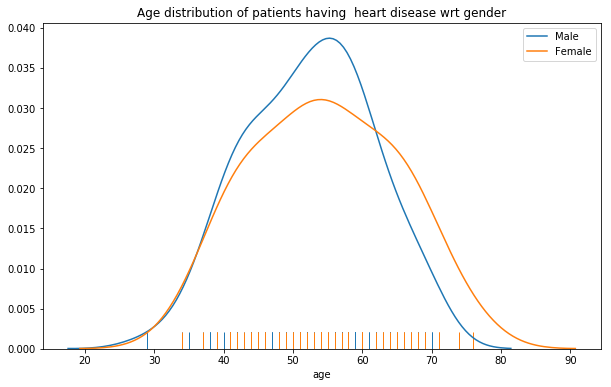

In [34]:
# visualizing the age distribution of people having heart attack wrt their gender
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (1, figsize = (10,6))

sns.distplot( data['age'][data['cp']>=1][ data['sex']== 1], hist=False, rug=True, label = 'Male')
sns.distplot( data['age'][data['cp']>=1][ data['sex']== 0], hist=False, rug=True, label = 'Female' )
plt.title('Age distribution of patients having  heart disease wrt gender')
plt.legend()
plt.show()

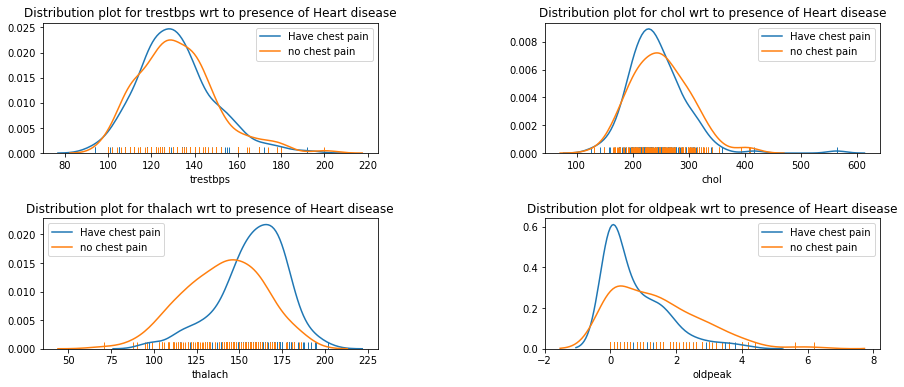

In [6]:
#visualizing the distribution of parameter values wrt presence of heart disease

param = ['trestbps', 'chol', 'thalach','oldpeak']

plt.figure (1, figsize = (15,6))
n = 0
for p in param:
    n = n + 1
    plt.subplot(2,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[p][data['cp'] >= 1], hist = False, rug = True, label = 'Have chest pain')
    sns.distplot(data[p][data['cp'] == 0], hist = False, rug = True, label = 'no chest pain')
    plt.title("Distribution plot for {} wrt to presence of Heart disease".format(p))
plt.legend()
plt.show() 